# Tugas Computer Vision - Segmentasi dengan Warna dan Manipulasi Dasar Citra

### NAMA: Ahmed Fisqiya Pinaldin
### NIM: A710190120

#### Lengkapi kode di bawah dan jalankan

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Ahmed Fisqiya Pinaldin"     
NIM = "A710190120"     
kota = "Surakarta"    
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Ahmed Fisqiya Pinaldin
NIM : A710190120
Kota: Surakarta
Sun Mar 27 05:13:39 2022

D:\Comvis
c:\users\hp\appdata\local\programs\python\python39\python.exe
3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]


##  Import the libraries

In [2]:
## Silakan import semua library yang diperlukan di cell ini
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Color segmentation

### Memakai OpenCV, extractlah bunga warna kuning pada file yang sudah disertakan

In [3]:
## Buka Florist_Shop.jpg
#  Convert ke HSV
#  Tentukan nilai H,S,V untuk warna yang akan diextract.
#  Extract bunga warna kuning. Tampilkan mask-nya, hasil extract, dan gambar asli.

bunga = cv2.imread("Florist_Shop.jpg")

In [4]:
# menentukan nilai hsv
hsv_bunga = cv2.cvtColor(bunga, cv2.COLOR_BGR2HSV)
hsv_bunga.shape

(416, 740, 3)

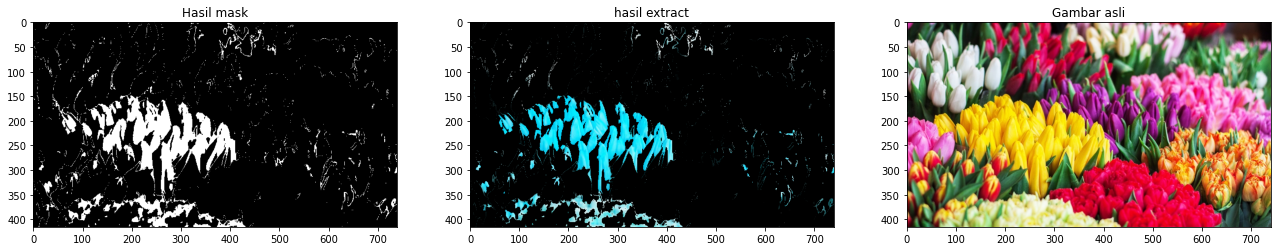

In [31]:
# meng-extract bunga berwarna kuning
kuning_bawah = np.array([25,0,0])
kuning_atas  = np.array([30,255,255])

mask1 = cv2.inRange(hsv_bunga, kuning_bawah, kuning_atas)

after = cv2.bitwise_and(bunga, bunga, mask=mask1)

plt.figure(figsize=[30,10])
plt.subplot(141);plt.imshow(mask1, cmap="gray");plt.title("Hasil mask");
plt.subplot(142);plt.imshow(after);plt.title("hasil extract");
plt.subplot(143);plt.imshow(bunga[:, :, ::-1]);plt.title("Gambar asli");


### Memakai OpenCV, extractlah tulisan "KLAYAR" yang berwarna merah

In [8]:
## Buka Pantai_Klayar.jpg
#  Convert ke HSV
#  Tentukan nilai H,S,V untuk warna yang akan diextract.
#  Extract tulisan "KLAYAR". Tampilkan mask-nya, hasil extract, dan gambar asli.

sea = cv2.imread("Pantai_Klayar.jpg")

In [9]:
# menentukan nilai hsv
hsv_klayar = cv2.cvtColor(sea, cv2.COLOR_BGR2HSV)
hsv_klayar.shape

(380, 630, 3)

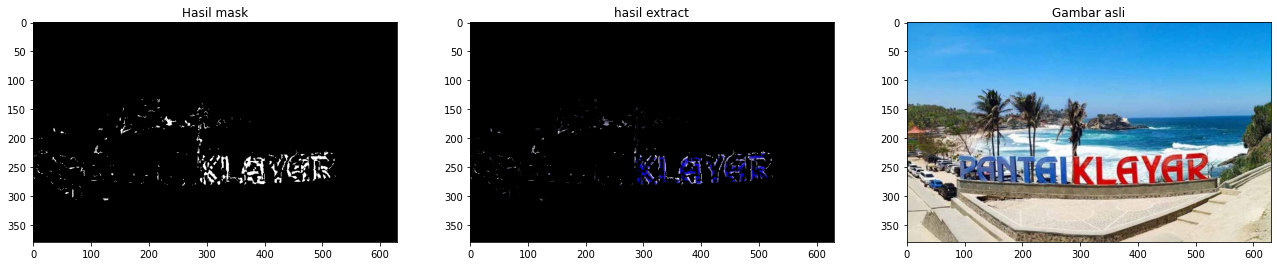

In [30]:
# meng-extract tulisan "KLAYAR"
merah_bawah = np.array([170,0,0])
merah_atas = np.array([190,255,255])

mask2 = cv2.inRange(hsv_klayar, merah_bawah, merah_atas)

result = cv2.bitwise_and(sea, sea, mask=mask2)

plt.figure(figsize=[30,10])
plt.subplot(141);plt.imshow(mask2, cmap="gray");plt.title("Hasil mask");
plt.subplot(142);plt.imshow(result);plt.title("hasil extract");
plt.subplot(143);plt.imshow(sea[:, :, ::-1]);plt.title("Gambar asli");

## Cropping

Kamu perlu mengakses file ikon kotamu yang pekan lalu di-submit. 

Pilih satu object di gambar itu (misal kalau gambar tugu jogja, pilih puncak tugunya). Lalu crop daerah itu dan tampilkan hasilnya.

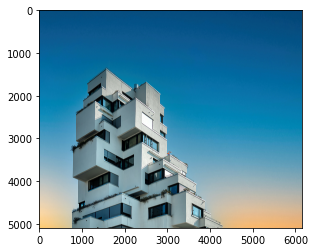

In [13]:
## Crop dan tampilkan:
city_bgr = cv2.imread("space.jpg",cv2.IMREAD_COLOR)
city_rgb = city_bgr[:,:,::-1] 

plt.imshow(city_rgb)

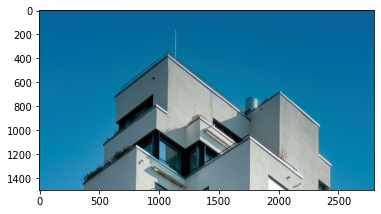

In [14]:
# meng-crop bagian atas gedung
pucuk = city_rgb[1000:2500, 500:3300]
plt.imshow(pucuk)

## Resizing

Lakukan pengubahan ukuran gambar seperti yang di video. Pakailah hasil crop ikon kotamu sebagai gambar yang diubah ukurannya.

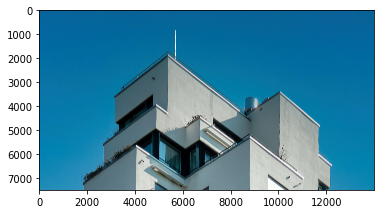

In [15]:
## Metode 1
resized_cropped_region_2x = cv2.resize(pucuk,None,fx=5, fy=5)
plt.imshow(resized_cropped_region_2x)

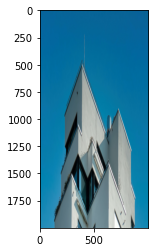

In [16]:
## Metode 2
space_width = 1000
space_height = 2000
dim = (space_width, space_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(pucuk, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)


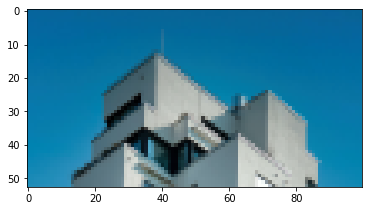

In [17]:
## Mempertahankan aspect ratio:
# Method 2: Using 'dsize'
desired_width = 100
aspect_ratio = desired_width / pucuk.shape[1]
desired_height = int(pucuk.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

# Resize image
resized_cropped_region = cv2.resize(pucuk, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

#### Dalam mengubah ukuran gambar, diperlukan interpolasi. Apa itu interpolasi? Apa saja jenis interpolasi yang ada di OpenCV?

##### Jawaban:
Interpolasi : mengubah ukuran gambar dengan menghitung nilai piksel untuk gambar baru dari gambar aslinya. <br>
Berikut jenis - jenis interpolasi pada OpenCV : INTER_NEAREST, INTER_LINEAR, INTER_AREA, INTER_CUBIC, dan INTER_LANCZOS4.

## Flipping Images
Memakai gambar ikon kotamu yang utuh, lakukan perputaran seperti yang di video. Tampilkan semuanya, termasuk gambar yang asli.

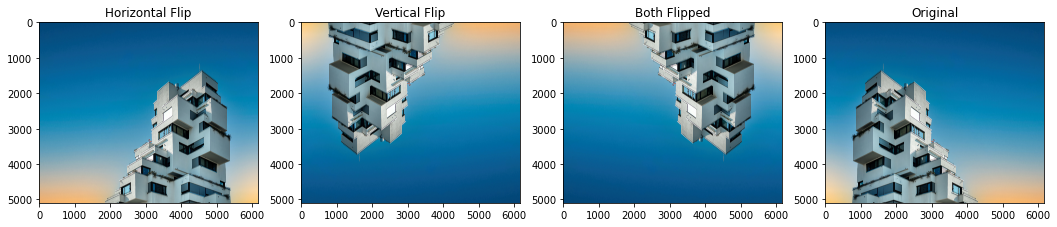

In [21]:
space_bgr = cv2.imread("space.jpg",cv2.IMREAD_COLOR)
space_rgb = space_bgr[:,:,::-1] 

space_rgb_flipped_horz = cv2.flip(space_rgb, 1)
space_rgb_flipped_vert = cv2.flip(space_rgb, 0)
space_rgb_flipped_both = cv2.flip(space_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(space_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(space_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(space_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(space_rgb);plt.title("Original");